In [1]:
import pandas as pd

import numpy as np

In [2]:
df_kabur = pd.read_csv('crawl_datax.csv')

In [4]:
len(df_kabur.index)

1500

In [3]:
df_kabur.index += 1
df_kabur.head()

,username,created_at,full_text
1,minggudesu,Thu Apr 10 06:50:34 +0000 2025,@benedictyche yoi disana bukan tempat yg rekom...
2,closvit,Thu Apr 10 06:47:40 +0000 2025,@skenacat AMIN PLS KASUNG TOLONG BAWA AKU KE K...
3,womensfootie_id,Thu Apr 10 06:26:49 +0000 2025,Satu lagi pesepak bola muda kita yang rela #Ka...
4,cotteshu,Thu Apr 10 06:06:16 +0000 2025,I thought he's that wni #.kaburajadulu ternyat...
5,slow_ly_ving_,Thu Apr 10 06:02:40 +0000 2025,@nmonarizqa Mmg #kaburajadulu itu bukan buat s...


# Case Folding

In [5]:
df_kabur['hasil_casefolding'] = df_kabur.apply(lambda row: row['full_text'].lower(), axis=1)

In [6]:
df_kabur.head()

,username,created_at,full_text,hasil_casefolding
1,minggudesu,Thu Apr 10 06:50:34 +0000 2025,@benedictyche yoi disana bukan tempat yg rekom...,@benedictyche yoi disana bukan tempat yg rekom...
2,closvit,Thu Apr 10 06:47:40 +0000 2025,@skenacat AMIN PLS KASUNG TOLONG BAWA AKU KE K...,@skenacat amin pls kasung tolong bawa aku ke k...
3,womensfootie_id,Thu Apr 10 06:26:49 +0000 2025,Satu lagi pesepak bola muda kita yang rela #Ka...,satu lagi pesepak bola muda kita yang rela #ka...
4,cotteshu,Thu Apr 10 06:06:16 +0000 2025,I thought he's that wni #.kaburajadulu ternyat...,i thought he's that wni #.kaburajadulu ternyat...
5,slow_ly_ving_,Thu Apr 10 06:02:40 +0000 2025,@nmonarizqa Mmg #kaburajadulu itu bukan buat s...,@nmonarizqa mmg #kaburajadulu itu bukan buat s...


# Cleaning Text


In [7]:
import re
import string

def clean_text(text):
  #menghapus Username Twitter
  text = re.sub ('@[^\s]+', ' ', text)

  #menghapus https dan http
  text = re.sub (r"(?:\@|http?\://|https?\://|www)\+", "", text)

  #menghilangkan tanda baca
  text = text.translate(str.maketrans(' ', ' ', string.punctuation))

  #mengganti karakter html dengan tanda petik
  text = re.sub('<.*?>', ' ', text)

  #mempertimbangkan huruf dan angka
  text = re.sub('[^a-zA-Z]', ' ', text)

  #mengganti line baru dengan spasi
  text = re.sub("\n", " ", text)

  #menghapus single char
  text =  re.sub(r"\b[a-zA-Z]\b", " ", text)

  # menghapus spasi pada awal dan akhir kalimat
  text = text.strip()

  #memisahkan dan menggabungkan kata
  text = ' '.join(text.split())
  return text


In [8]:
df_kabur['hasil_cleansing'] = df_kabur['hasil_casefolding'].apply(clean_text)


In [9]:
df_kabur.head()

,username,created_at,full_text,hasil_casefolding,hasil_cleansing
1,minggudesu,Thu Apr 10 06:50:34 +0000 2025,@benedictyche yoi disana bukan tempat yg rekom...,@benedictyche yoi disana bukan tempat yg rekom...,yoi disana bukan tempat yg rekomen buat kabura...
2,closvit,Thu Apr 10 06:47:40 +0000 2025,@skenacat AMIN PLS KASUNG TOLONG BAWA AKU KE K...,@skenacat amin pls kasung tolong bawa aku ke k...,amin pls kasung tolong bawa aku ke korea kabur...
3,womensfootie_id,Thu Apr 10 06:26:49 +0000 2025,Satu lagi pesepak bola muda kita yang rela #Ka...,satu lagi pesepak bola muda kita yang rela #ka...,satu lagi pesepak bola muda kita yang rela kab...
4,cotteshu,Thu Apr 10 06:06:16 +0000 2025,I thought he's that wni #.kaburajadulu ternyat...,i thought he's that wni #.kaburajadulu ternyat...,thought hes that wni kaburajadulu ternyata bul...
5,slow_ly_ving_,Thu Apr 10 06:02:40 +0000 2025,@nmonarizqa Mmg #kaburajadulu itu bukan buat s...,@nmonarizqa mmg #kaburajadulu itu bukan buat s...,mmg kaburajadulu itu bukan buat semua orang ha...


# Cleansing Data

In [ ]:
# import re
# import string

# def cleansing_data (kalimat):

#     # menghapus angka dari kalimat
#     hasil = re.sub(r"\d+", "", kalimat)

#     # menghapus tanda baca dari kalimat
#     hasil = hasil.translate(str.maketrans("","",string.punctuation))

#     # Menghapus emotikon dari kalimat
#     hasil = re.sub(r'[^\w\s,]', '', hasil)

#     # menghapus spasi pada awal dan akhir kalimat
#     hasil = hasil.strip()

#     return hasil

In [ ]:
# df_ikd['hasil_clean'] = df_ikd['hasil_casefolding'].apply(cleansing_data)
# df_ikd.head()

,userName,score,at,content,hasil_casefolding,hasil_clean
1,Rio,4,2025-05-04 08:49:35,jangan busy terus dong😭 aku udah refresh serin...,jangan busy terus dong😭 aku udah refresh serin...,jangan busy terus dong aku udah refresh sering...
2,RADITYA Permana,5,2025-05-04 08:39:08,aplikasi nya bagus ga ada limit chat sama seka...,aplikasi nya bagus ga ada limit chat sama seka...,aplikasi nya bagus ga ada limit chat sama seka...
3,vandel subagyo,5,2025-05-04 03:41:38,goodjob,goodjob,goodjob
4,Memamgjago,5,2025-05-04 03:24:56,bagus dan keren lebih keren ini daripada chatgpt,bagus dan keren lebih keren ini daripada chatgpt,bagus dan keren lebih keren ini daripada chatgpt
5,rudee balboa,5,2025-05-04 00:50:57,Coba dulu..,coba dulu..,coba dulu


In [10]:
def remove_repeated_characters(text):
    pattern = re.compile(r"(.)\1{2,}")  # Pola untuk mengidentifikasi huruf yang diulang minimal 3 kali
    return pattern.sub(r"\1\1", text)  # Mengganti dengan dua kali huruf yang diulang

In [11]:
df_kabur['hasil_cleansing'] = df_kabur['hasil_cleansing'].apply(remove_repeated_characters)


In [12]:
df_kabur.head()

,username,created_at,full_text,hasil_casefolding,hasil_cleansing
1,minggudesu,Thu Apr 10 06:50:34 +0000 2025,@benedictyche yoi disana bukan tempat yg rekom...,@benedictyche yoi disana bukan tempat yg rekom...,yoi disana bukan tempat yg rekomen buat kabura...
2,closvit,Thu Apr 10 06:47:40 +0000 2025,@skenacat AMIN PLS KASUNG TOLONG BAWA AKU KE K...,@skenacat amin pls kasung tolong bawa aku ke k...,amin pls kasung tolong bawa aku ke korea kabur...
3,womensfootie_id,Thu Apr 10 06:26:49 +0000 2025,Satu lagi pesepak bola muda kita yang rela #Ka...,satu lagi pesepak bola muda kita yang rela #ka...,satu lagi pesepak bola muda kita yang rela kab...
4,cotteshu,Thu Apr 10 06:06:16 +0000 2025,I thought he's that wni #.kaburajadulu ternyat...,i thought he's that wni #.kaburajadulu ternyat...,thought hes that wni kaburajadulu ternyata bul...
5,slow_ly_ving_,Thu Apr 10 06:02:40 +0000 2025,@nmonarizqa Mmg #kaburajadulu itu bukan buat s...,@nmonarizqa mmg #kaburajadulu itu bukan buat s...,mmg kaburajadulu itu bukan buat semua orang ha...


# Tokenizing

In [13]:
!pip install nltk


In [14]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [15]:
from nltk.tokenize import word_tokenize

def text_tokenize(text) :
  tokens = nltk.tokenize.word_tokenize(text)
  return tokens

In [16]:
df_kabur['hasil_tokenisasi'] = df_kabur['hasil_cleansing'].apply(text_tokenize)

In [ ]:
df_kabur.head()

,username,created_at,full_text,hasil_casefolding,hasil_cleansing,hasil_tokenisasi
1,minggudesu,Thu Apr 10 06:50:34 +0000 2025,@benedictyche yoi disana bukan tempat yg rekom...,@benedictyche yoi disana bukan tempat yg rekom...,yoi disana bukan tempat yg rekomen buat kabura...,"[yoi, disana, bukan, tempat, yg, rekomen, buat..."
2,closvit,Thu Apr 10 06:47:40 +0000 2025,@skenacat AMIN PLS KASUNG TOLONG BAWA AKU KE K...,@skenacat amin pls kasung tolong bawa aku ke k...,amin pls kasung tolong bawa aku ke korea kabur...,"[amin, pls, kasung, tolong, bawa, aku, ke, kor..."
3,womensfootie_id,Thu Apr 10 06:26:49 +0000 2025,Satu lagi pesepak bola muda kita yang rela #Ka...,satu lagi pesepak bola muda kita yang rela #ka...,satu lagi pesepak bola muda kita yang rela kab...,"[satu, lagi, pesepak, bola, muda, kita, yang, ..."
4,cotteshu,Thu Apr 10 06:06:16 +0000 2025,I thought he's that wni #.kaburajadulu ternyat...,i thought he's that wni #.kaburajadulu ternyat...,thought hes that wni kaburajadulu ternyata bul...,"[thought, hes, that, wni, kaburajadulu, ternya..."
5,slow_ly_ving_,Thu Apr 10 06:02:40 +0000 2025,@nmonarizqa Mmg #kaburajadulu itu bukan buat s...,@nmonarizqa mmg #kaburajadulu itu bukan buat s...,mmg kaburajadulu itu bukan buat semua orang ha...,"[mmg, kaburajadulu, itu, bukan, buat, semua, o..."


# Normalisasi

In [17]:
kamus_slang = pd.read_csv('Kamus_baku_fix.csv', encoding='utf-8', header=None)

In [18]:
# Konversi DataFrame ke dictionary
slang_dict = {}
for index, row in kamus_slang.iterrows():
    if row.iloc[0] not in slang_dict:
        slang_dict[row.iloc[0]] = row.iloc[1]

def normalized_term(document):
    normalized = []
    for term in document:
        term_lower = term.lower()  # normalisasi lowercase juga
        if term_lower in slang_dict:
            normalized.append(slang_dict[term_lower])
        else:
            normalized.append(term)
    return normalized


In [19]:
df_kabur['hasil_normalisasi'] = df_kabur['hasil_tokenisasi'].apply(normalized_term)
print(df_kabur[['hasil_tokenisasi', 'hasil_normalisasi']].head())

                                    hasil_tokenisasi  \
1  [yoi, disana, bukan, tempat, yg, rekomen, buat...   
2  [amin, pls, kasung, tolong, bawa, aku, ke, kor...   
3  [satu, lagi, pesepak, bola, muda, kita, yang, ...   
4  [thought, hes, that, wni, kaburajadulu, ternya...   
5  [mmg, kaburajadulu, itu, bukan, buat, semua, o...   

                                   hasil_normalisasi  
1  [iya, disana, bukan, tempat, yang, rekomendasi...  
2  [amin, mohon, kasung, tolong, bawa, aku, ke, k...  
3  [satu, lagi, pesepak, bola, muda, kita, yang, ...  
4  [thought, hes, itu, wni, kaburajadulu, ternyat...  
5  [memang, kaburajadulu, itu, bukan, buat, semua...  


In [20]:
df_kabur.head()

,username,created_at,full_text,hasil_casefolding,hasil_cleansing,hasil_tokenisasi,hasil_normalisasi
1,minggudesu,Thu Apr 10 06:50:34 +0000 2025,@benedictyche yoi disana bukan tempat yg rekom...,@benedictyche yoi disana bukan tempat yg rekom...,yoi disana bukan tempat yg rekomen buat kabura...,"[yoi, disana, bukan, tempat, yg, rekomen, buat...","[iya, disana, bukan, tempat, yang, rekomendasi..."
2,closvit,Thu Apr 10 06:47:40 +0000 2025,@skenacat AMIN PLS KASUNG TOLONG BAWA AKU KE K...,@skenacat amin pls kasung tolong bawa aku ke k...,amin pls kasung tolong bawa aku ke korea kabur...,"[amin, pls, kasung, tolong, bawa, aku, ke, kor...","[amin, mohon, kasung, tolong, bawa, aku, ke, k..."
3,womensfootie_id,Thu Apr 10 06:26:49 +0000 2025,Satu lagi pesepak bola muda kita yang rela #Ka...,satu lagi pesepak bola muda kita yang rela #ka...,satu lagi pesepak bola muda kita yang rela kab...,"[satu, lagi, pesepak, bola, muda, kita, yang, ...","[satu, lagi, pesepak, bola, muda, kita, yang, ..."
4,cotteshu,Thu Apr 10 06:06:16 +0000 2025,I thought he's that wni #.kaburajadulu ternyat...,i thought he's that wni #.kaburajadulu ternyat...,thought hes that wni kaburajadulu ternyata bul...,"[thought, hes, that, wni, kaburajadulu, ternya...","[thought, hes, itu, wni, kaburajadulu, ternyat..."
5,slow_ly_ving_,Thu Apr 10 06:02:40 +0000 2025,@nmonarizqa Mmg #kaburajadulu itu bukan buat s...,@nmonarizqa mmg #kaburajadulu itu bukan buat s...,mmg kaburajadulu itu bukan buat semua orang ha...,"[mmg, kaburajadulu, itu, bukan, buat, semua, o...","[memang, kaburajadulu, itu, bukan, buat, semua..."


In [ ]:
#untuk melihat frekuensi kata/analisis lebih lanjut
cek_baku = df_kabur[['hasil_normalisasi']]
cek_baku.to_csv('cek_ikd.csv', index = False) # save data ulasan yang masih mentah

# Filtering

In [21]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00


In [22]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Inisialisasi StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()

# Menghapus kata "kenapa" dan "apa" dari daftar stopwords
stopwords = [word for word in stopwords if word not in ['seharusnya','saat','hanya','sudah','saya','supaya','biar','pasti','kenapa', 'apa','mengapa','guna','tidak','lagi','untuk','sementara','belum','setelah','masih','bisa','ada','agak','ingin','mau','pengen','mari','kita','itu','apa','apakah','dia','demi']]

# Menambahkan kata-kata tambahan ke dalam daftar stopwords
additional_stopwords = [
    'nya','di','nya','sih','kok','koq','dan','ke','ini','saja','itu','lah',
    'dan','ke','yaa','yg','yng','loh','lah','toh','jaring','si','sih',
    'dong','ni','satu','aj','yah','file','kan','serba','coy','cok',
    'cuk','to','kantor','yang','saya','kalau','klo',
    'untuk','atau','kalian','anda sekalian','kamu sekalian','kalian','dalam',
    'lagi','hanya','data','amp','httpstco','prabowo','harimau','ama','an','the',
    'ayo','om','km','pd','link','eh','buzzer','dg','nder','wkwkwk','yaallah',
    'cabutuutni','jq','bidanviral','videoviral','videobucin','busalsa','omonomon',
    'slot','jlpt','tokuteiginou','anime','httpstcow','vscbugil','wkwkwkw','httpstcoi',
    'bla','ericthohirout','kluivertout','scandal','httpstcor','gpp','tahir','ted','jua','les',
    'sioeng','maung','bagong','aidin','minal','faizin','kimbabsushionigiri','pemerintahannyatau',
    'au','lokercot','babibu','rank','masyaallah','vote','anjay','bjir','isekai','sea','lgbt','yahudi',
    'kerjadijepang','starship','yh','wkwkkw','koar','noh','mbakku','cpns','sakura','mun','hmm','khap',
    'madrid','httpstcom','ormas','games','mbah','hampersnya','guys','sis','httpstcox','hi','dubes','bub',
    'ala','wok','wowo','ndut','sang','nschecompany','sia','judol','na','vcscrott','kaweenn','wkwkwkwkw',
    'hh','preloved','huft','enih','acc','tetot','dai','st','bcs','jt','kanji','twit','tkdn','pak','httpstcodkc',
    'ihsg','prabs','gon','tolakuutni','huhuhu','tokuteiginou','tolakruupolri','tolakdwifungsiabri','ungsiabri',
    'nder','slotgacor','ngakakbangsat','ruu','wow','the','an','plong','jokowi','wkkw','httpstcosltfpkv',
    'httpstcofbigucaqzx','timnas','kuwait','kimsoohyun','httpstcohlcgedtarr','thaeyung','stationbet','danakaget','mingyusweetestboy',
    'th','httpstcorbsbdpuzjj','depo','wd','gameslot','slotolympus','fyp','viral','tranding','sosmed','jacpot','geminint','videobucin',
    'busalsaviral','httpstcojlz','wfn','qz','amin','wdyt','hahaha','chatgpt','imagine','deh','kak','ros','qlbxshebx','ovjbag','indonesiamakingelap',
    'httpstcokad','vjyduzjx','ki','kembalikantnikebarak','hxyxvvzr','crypto','savecasn','artisbersuara','httpstcotkoudoucix','macha','httpstcoodgcgfum','oligarkipenguasanegeri','demokarasioligarki','adilijokowisampaihukumanmati',
    'slotgacorhariini','aritogel','rungkad','ygga','mrvftw','httpstcopkh','sal','jaehyu','bapak'
]

stopwords.extend(additional_stopwords)

# Menampilkan daftar stopwords akhir
print(stopwords)


['yang', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'ini', 'karena', 'kepada', 'oleh', 'harus', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'hal', 'ketika', 'adalah', 'dalam', 'bahwa', 'atau', 'dengan', 'akan', 'juga', 'mereka', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'yaitu', 'yakni', 'daripada', 'itulah', 'maka', 'tentang', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'tetapi', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'juga', 'nggak', 'nanti', 'melainkan', 'oh', 'ok', 'sebetulnya', 'setiap', 'setidaknya', 'sesuatu', 'saja', 'toh', 'ya', 'walau', 'tolong', 'tentu', 'amat', 'apalagi', 'bagaimanapun', 'nya', 'di', 'nya', 'sih', 'kok', 'koq', 'dan', 'ke', 'ini', 'saja', 'itu', 'lah', 'dan', 

In [23]:
def text_stopword(tokens):
    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords:
            cleaned_tokens.append(token)
    return cleaned_tokens

In [24]:
df_kabur['hasil_stops'] = df_kabur['hasil_normalisasi'].apply(text_stopword)
df_kabur.head()

,username,created_at,full_text,hasil_casefolding,hasil_cleansing,hasil_tokenisasi,hasil_normalisasi,hasil_stops
1,minggudesu,Thu Apr 10 06:50:34 +0000 2025,@benedictyche yoi disana bukan tempat yg rekom...,@benedictyche yoi disana bukan tempat yg rekom...,yoi disana bukan tempat yg rekomen buat kabura...,"[yoi, disana, bukan, tempat, yg, rekomen, buat...","[iya, disana, bukan, tempat, yang, rekomendasi...","[iya, disana, bukan, tempat, rekomendasi, buat..."
2,closvit,Thu Apr 10 06:47:40 +0000 2025,@skenacat AMIN PLS KASUNG TOLONG BAWA AKU KE K...,@skenacat amin pls kasung tolong bawa aku ke k...,amin pls kasung tolong bawa aku ke korea kabur...,"[amin, pls, kasung, tolong, bawa, aku, ke, kor...","[amin, mohon, kasung, tolong, bawa, aku, ke, k...","[mohon, kasung, bawa, aku, korea, kaburajadulu]"
3,womensfootie_id,Thu Apr 10 06:26:49 +0000 2025,Satu lagi pesepak bola muda kita yang rela #Ka...,satu lagi pesepak bola muda kita yang rela #ka...,satu lagi pesepak bola muda kita yang rela kab...,"[satu, lagi, pesepak, bola, muda, kita, yang, ...","[satu, lagi, pesepak, bola, muda, kita, yang, ...","[pesepak, bola, muda, kita, rela, kaburajadulu..."
4,cotteshu,Thu Apr 10 06:06:16 +0000 2025,I thought he's that wni #.kaburajadulu ternyat...,i thought he's that wni #.kaburajadulu ternyat...,thought hes that wni kaburajadulu ternyata bul...,"[thought, hes, that, wni, kaburajadulu, ternya...","[thought, hes, itu, wni, kaburajadulu, ternyat...","[thought, hes, wni, kaburajadulu, ternyata, bu..."
5,slow_ly_ving_,Thu Apr 10 06:02:40 +0000 2025,@nmonarizqa Mmg #kaburajadulu itu bukan buat s...,@nmonarizqa mmg #kaburajadulu itu bukan buat s...,mmg kaburajadulu itu bukan buat semua orang ha...,"[mmg, kaburajadulu, itu, bukan, buat, semua, o...","[memang, kaburajadulu, itu, bukan, buat, semua...","[memang, kaburajadulu, bukan, buat, semua, ora..."


In [ ]:
# df_ikd.drop(columns=['hasil_stops'], inplace=True)

In [ ]:
df_kabur.head(20)

,username,created_at,full_text,hasil_casefolding,hasil_cleansing,hasil_tokenisasi,hasil_normalisasi,hasil_stops
1,minggudesu,Thu Apr 10 06:50:34 +0000 2025,@benedictyche yoi disana bukan tempat yg rekom...,@benedictyche yoi disana bukan tempat yg rekom...,yoi disana bukan tempat yg rekomen buat kabura...,"[yoi, disana, bukan, tempat, yg, rekomen, buat...","[iya, disana, bukan, tempat, yang, rekomendasi...","[iya, disana, bukan, tempat, rekomendasi, buat..."
2,closvit,Thu Apr 10 06:47:40 +0000 2025,@skenacat AMIN PLS KASUNG TOLONG BAWA AKU KE K...,@skenacat amin pls kasung tolong bawa aku ke k...,amin pls kasung tolong bawa aku ke korea kabur...,"[amin, pls, kasung, tolong, bawa, aku, ke, kor...","[amin, mohon, kasung, tolong, bawa, aku, ke, k...","[amin, mohon, kasung, bawa, aku, korea]"
3,womensfootie_id,Thu Apr 10 06:26:49 +0000 2025,Satu lagi pesepak bola muda kita yang rela #Ka...,satu lagi pesepak bola muda kita yang rela #ka...,satu lagi pesepak bola muda kita yang rela kab...,"[satu, lagi, pesepak, bola, muda, kita, yang, ...","[satu, lagi, pesepak, bola, muda, kita, yang, ...","[pesepak, bola, muda, rela, mengejar, mimpi, k..."
4,cotteshu,Thu Apr 10 06:06:16 +0000 2025,I thought he's that wni #.kaburajadulu ternyat...,i thought he's that wni #.kaburajadulu ternyat...,thought hes that wni kaburajadulu ternyata bul...,"[thought, hes, that, wni, kaburajadulu, ternya...","[thought, hes, itu, wni, kaburajadulu, ternyat...","[thought, hes, wni, ternyata, bule, beneran, a..."
5,slow_ly_ving_,Thu Apr 10 06:02:40 +0000 2025,@nmonarizqa Mmg #kaburajadulu itu bukan buat s...,@nmonarizqa mmg #kaburajadulu itu bukan buat s...,mmg kaburajadulu itu bukan buat semua orang ha...,"[mmg, kaburajadulu, itu, bukan, buat, semua, o...","[memang, kaburajadulu, itu, bukan, buat, semua...","[memang, bukan, buat, semua, orang, benar, sel..."
6,sogosagi,Thu Apr 10 05:59:13 +0000 2025,@ktgcrispyy_ sudah siap kaburajadulu kak macha...,@ktgcrispyy_ sudah siap kaburajadulu kak macha...,sudah siap kaburajadulu kak macha karena cocok...,"[sudah, siap, kaburajadulu, kak, macha, karena...","[sudah, siap, kaburajadulu, kak, macha, karena...","[siap, kak, macha, cocok, dipinang, jadi, istr..."
7,darlingRui17,Thu Apr 10 05:48:17 +0000 2025,@baroquebandit Mari kita #KaburAjaDulu,@baroquebandit mari kita #kaburajadulu,mari kita kaburajadulu,"[mari, kita, kaburajadulu]","[mari, kita, kaburajadulu]",[]
8,En_nan110,Thu Apr 10 05:31:02 +0000 2025,Disini jadi ngerasa kalau udah kebanyakan jeje...,disini jadi ngerasa kalau udah kebanyakan jeje...,disini jadi ngerasa kalau udah kebanyakan jeje...,"[disini, jadi, ngerasa, kalau, udah, kebanyaka...","[disini, jadi, ngerasa, kalau, sudah, banyak, ...","[disini, jadi, ngerasa, banyak, jejepangan, ks..."
9,nctsunzen,Thu Apr 10 05:12:12 +0000 2025,trs dia bilng ke ak jangan mau kerja di indo l...,trs dia bilng ke ak jangan mau kerja di indo l...,trs dia bilng ke ak jangan mau kerja di indo l...,"[trs, dia, bilng, ke, ak, jangan, mau, kerja, ...","[terus, dia, mengatakan, ke, saya, jangan, ing...","[terus, mengatakan, jangan, kerja, indonesia, ..."
10,septianiii,Thu Apr 10 05:09:32 +0000 2025,@atikaluthfiy Dia itu aktivis #kaburajadulu,@atikaluthfiy dia itu aktivis #kaburajadulu,dia itu aktivis kaburajadulu,"[dia, itu, aktivis, kaburajadulu]","[dia, itu, aktivis, kaburajadulu]",[aktivis]


# Stemming

In [25]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

In [26]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

whitelist = {"belajar", "semoga", "mengatakan","apakah","silahkan","giliran"}


def teks_stemming_whitelist(tokens):
    hasil = []
    for token in tokens:
        if token.lower() in whitelist:
            hasil.append(token)
        else:
            hasil.append(stemmer.stem(token))
    return hasil

# Remove the line below which caused the NameError
# hasil_stemming = teks_stemming_whitelist(tokens)
# print(hasil_stemming)

In [27]:
df_kabur['hasil_stemming'] = df_kabur['hasil_stops'].apply(teks_stemming_whitelist)

In [28]:
df_kabur.head(20)

,username,created_at,full_text,hasil_casefolding,hasil_cleansing,hasil_tokenisasi,hasil_normalisasi,hasil_stops,hasil_stemming
1,minggudesu,Thu Apr 10 06:50:34 +0000 2025,@benedictyche yoi disana bukan tempat yg rekom...,@benedictyche yoi disana bukan tempat yg rekom...,yoi disana bukan tempat yg rekomen buat kabura...,"[yoi, disana, bukan, tempat, yg, rekomen, buat...","[iya, disana, bukan, tempat, yang, rekomendasi...","[iya, disana, bukan, tempat, rekomendasi, buat...","[iya, sana, bukan, tempat, rekomendasi, buat, ..."
2,closvit,Thu Apr 10 06:47:40 +0000 2025,@skenacat AMIN PLS KASUNG TOLONG BAWA AKU KE K...,@skenacat amin pls kasung tolong bawa aku ke k...,amin pls kasung tolong bawa aku ke korea kabur...,"[amin, pls, kasung, tolong, bawa, aku, ke, kor...","[amin, mohon, kasung, tolong, bawa, aku, ke, k...","[mohon, kasung, bawa, aku, korea, kaburajadulu]","[mohon, kasung, bawa, aku, korea, kaburajadulu]"
3,womensfootie_id,Thu Apr 10 06:26:49 +0000 2025,Satu lagi pesepak bola muda kita yang rela #Ka...,satu lagi pesepak bola muda kita yang rela #ka...,satu lagi pesepak bola muda kita yang rela kab...,"[satu, lagi, pesepak, bola, muda, kita, yang, ...","[satu, lagi, pesepak, bola, muda, kita, yang, ...","[pesepak, bola, muda, kita, rela, kaburajadulu...","[sepak, bola, muda, kita, rela, kaburajadulu, ..."
4,cotteshu,Thu Apr 10 06:06:16 +0000 2025,I thought he's that wni #.kaburajadulu ternyat...,i thought he's that wni #.kaburajadulu ternyat...,thought hes that wni kaburajadulu ternyata bul...,"[thought, hes, that, wni, kaburajadulu, ternya...","[thought, hes, itu, wni, kaburajadulu, ternyat...","[thought, hes, wni, kaburajadulu, ternyata, bu...","[thought, hes, wni, kaburajadulu, nyata, bule,..."
5,slow_ly_ving_,Thu Apr 10 06:02:40 +0000 2025,@nmonarizqa Mmg #kaburajadulu itu bukan buat s...,@nmonarizqa mmg #kaburajadulu itu bukan buat s...,mmg kaburajadulu itu bukan buat semua orang ha...,"[mmg, kaburajadulu, itu, bukan, buat, semua, o...","[memang, kaburajadulu, itu, bukan, buat, semua...","[memang, kaburajadulu, bukan, buat, semua, ora...","[memang, kaburajadulu, bukan, buat, semua, ora..."
6,sogosagi,Thu Apr 10 05:59:13 +0000 2025,@ktgcrispyy_ sudah siap kaburajadulu kak macha...,@ktgcrispyy_ sudah siap kaburajadulu kak macha...,sudah siap kaburajadulu kak macha karena cocok...,"[sudah, siap, kaburajadulu, kak, macha, karena...","[sudah, siap, kaburajadulu, kak, macha, karena...","[sudah, siap, kaburajadulu, cocok, dipinang, j...","[sudah, siap, kaburajadulu, cocok, pinang, jad..."
7,darlingRui17,Thu Apr 10 05:48:17 +0000 2025,@baroquebandit Mari kita #KaburAjaDulu,@baroquebandit mari kita #kaburajadulu,mari kita kaburajadulu,"[mari, kita, kaburajadulu]","[mari, kita, kaburajadulu]","[mari, kita, kaburajadulu]","[mari, kita, kaburajadulu]"
8,En_nan110,Thu Apr 10 05:31:02 +0000 2025,Disini jadi ngerasa kalau udah kebanyakan jeje...,disini jadi ngerasa kalau udah kebanyakan jeje...,disini jadi ngerasa kalau udah kebanyakan jeje...,"[disini, jadi, ngerasa, kalau, udah, kebanyaka...","[disini, jadi, ngerasa, kalau, sudah, banyak, ...","[disini, jadi, ngerasa, sudah, banyak, jejepan...","[sini, jadi, ngerasa, sudah, banyak, jejepanga..."
9,nctsunzen,Thu Apr 10 05:12:12 +0000 2025,trs dia bilng ke ak jangan mau kerja di indo l...,trs dia bilng ke ak jangan mau kerja di indo l...,trs dia bilng ke ak jangan mau kerja di indo l...,"[trs, dia, bilng, ke, ak, jangan, mau, kerja, ...","[terus, dia, mengatakan, ke, saya, jangan, ing...","[terus, dia, mengatakan, jangan, ingin, kerja,...","[terus, dia, mengatakan, jangan, ingin, kerja,..."
10,septianiii,Thu Apr 10 05:09:32 +0000 2025,@atikaluthfiy Dia itu aktivis #kaburajadulu,@atikaluthfiy dia itu aktivis #kaburajadulu,dia itu aktivis kaburajadulu,"[dia, itu, aktivis, kaburajadulu]","[dia, itu, aktivis, kaburajadulu]","[dia, aktivis, kaburajadulu]","[dia, aktivis, kaburajadulu]"


# Wordcloud

In [29]:
!pip install wordcloud matplotlib


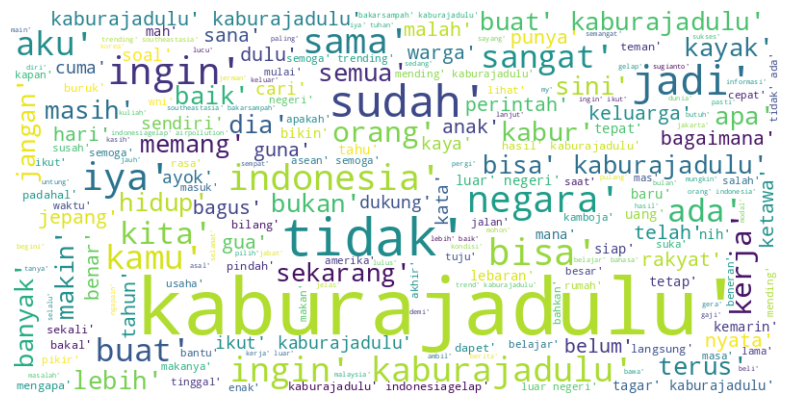

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pastikan dataframe df_ikd dan kolom 'hasil_stemming' ada
# Gabungkan semua teks menjadi satu string besar
try:
    text = " ".join(df_kabur['hasil_stemming'].astype(str))  # Pastikan semua teks dalam format string
except Exception as e:
    print(f"Error: {e}")

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Tampilkan WordCloud menggunakan matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hapus axis
plt.show()


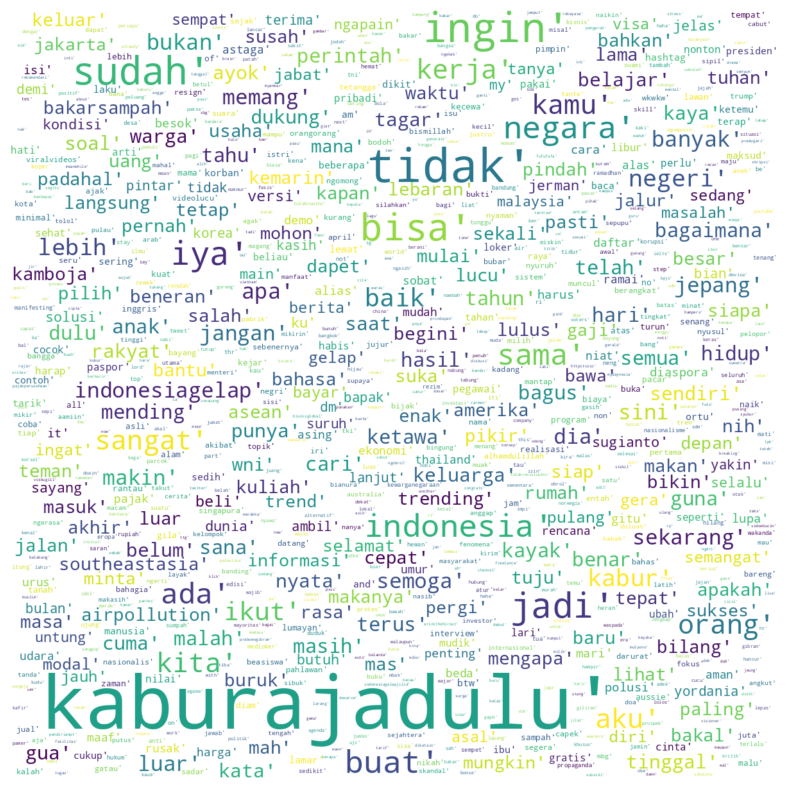

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pastikan dataframe df_ikd dan kolom 'hasil_stemming' ada
# Gabungkan semua teks menjadi satu string besar
try:
    text = " ".join(df_kabur['hasil_stemming'].astype(str))  # Pastikan semua teks dalam format string
except Exception as e:
    print(f"Error: {e}")

# Buat WordCloud dengan kata terbesar di tengah dan berbentuk lingkaran
wordcloud = WordCloud(
    width=800,
    height=800,
    background_color='white',
    collocations=False,
    prefer_horizontal=1.0,
    contour_color='black',
    contour_width=1,
    max_words=2000,
    colormap='viridis',
    mode='RGBA',
    scale=1.5
).generate(text)

# Tampilkan WordCloud menggunakan matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hapus axis
plt.show()


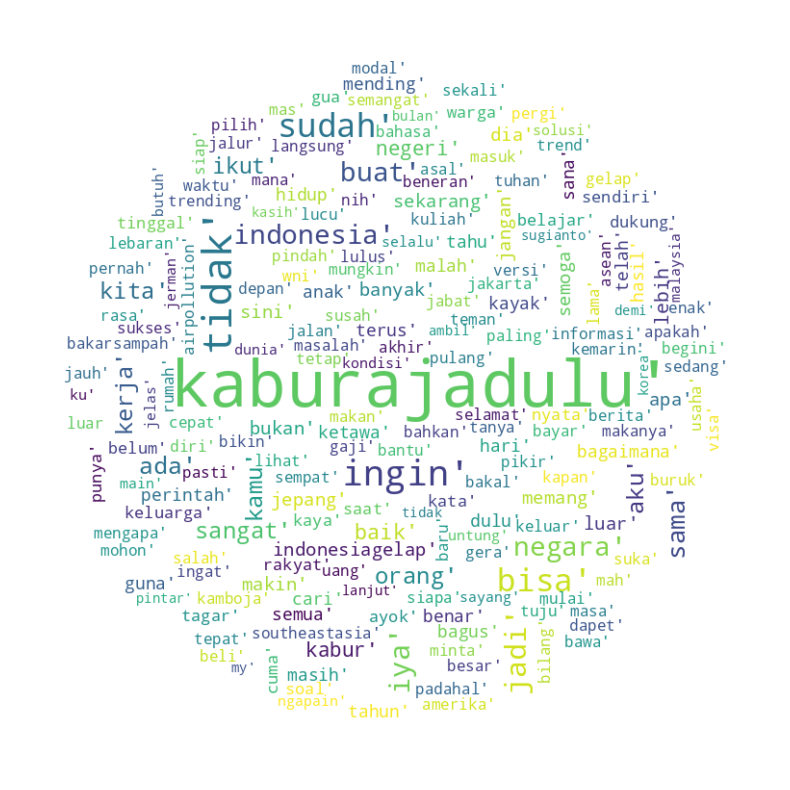

In [32]:
try:
    text = " ".join(df_kabur['hasil_stemming'].astype(str))  # Pastikan semua teks dalam format string
except Exception as e:
    print(f"Error: {e}")

# Membuat mask berbentuk lingkaran
x, y = np.ogrid[:800, :800]
mask = (x - 400) ** 2 + (y - 400) ** 2 > 350 ** 2
mask = 255 * mask.astype(int)

# Buat WordCloud dengan mask berbentuk lingkaran
wc = WordCloud(
    width=800,
    height=800,
    background_color="white",
    stopwords=stopwords,
    mask=mask,
    collocations=False
)

wc.generate(text)

# Tampilkan WordCloud menggunakan matplotlib
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

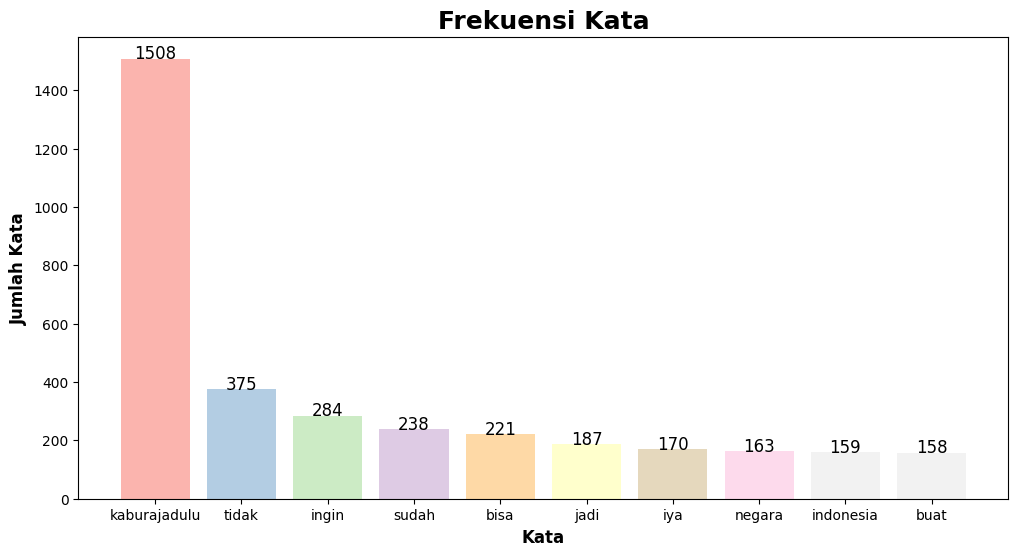

In [33]:
from collections import Counter

text = " ".join([" ".join(lst) for lst in df_kabur['hasil_stemming']])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, count = zip(*top_words)

# Definisikan palet warna dengan warna yang lebih lembut
colors = plt.cm.Pastel1(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=0)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2, num + 0.3, str(num), fontsize=12, color='black', ha='center')

plt.show()

In [ ]:
import ast

# Ubah list ke string agar bisa disimpan di CSV
df_kabur['hasil_stemming_str'] = df_kabur['hasil_stemming'].apply(str)

clean_data = df_kabur[['username', 'hasil_stemming_str']]

clean_data.to_csv('clean_data.csv', index=False)

# Simpan file
df_kabur.to_csv('df_kabur_clean.csv', index=False)

In [ ]:
clean_data = df_kabur[['username', 'hasil_stemming_str']]

clean_data.to_csv('clean_data.csv', index=False)


# Labelling Emolex


In [34]:
nrc_df = pd.read_excel('Emolex_indonesia.xlsx')
nrc_df = nrc_df.fillna(0)  # jika ada NaN, isi dengan 0

In [35]:
emotion_categories = ['anger', 'anticipation', 'disgust', 'fear', 'joy',
                      'sadness', 'surprise', 'trust']
emotion_words = {emotion: {} for emotion in emotion_categories}

In [36]:
print(nrc_df.columns.tolist())

['Indonesian Word', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']


In [37]:
for i in range(len(nrc_df)):
    word = str(nrc_df.iloc[i, 0]).strip()  # kata di kolom pertama
    for j, emotion in enumerate(emotion_categories):
        if nrc_df.iloc[i, j+1] == 1:  # kolom 1–8 adalah emosi (1 berarti terkait)
            emotion_words[emotion][word] = 1  # default bobot

In [38]:
weak_word = 'kaburajadulu'
weak_emotions = ['trust','anger','anticipation','joy','disgust']
weak_weight = 0.5

In [39]:
for emo in weak_emotions:
    emotion_words[emo][weak_word] = weak_weight  # override bobot

def detect_dominant_emotion(tokens):
    emotion_counts = {emotion: 0 for emotion in emotion_categories}
    for token in tokens:
        for emotion in emotion_categories:
            if token in emotion_words[emotion]:
                emotion_counts[emotion] += emotion_words[emotion][token]
    max_emotion = max(emotion_counts, key=emotion_counts.get)
    if emotion_counts[max_emotion] == 0:
        return 'neutral'
    else:
        return max_emotion

In [40]:
# The apply call remains the same, but now the function can handle the list input
df_kabur['dominant_emotion'] = df_kabur['hasil_stemming'].apply(detect_dominant_emotion)

In [41]:
df_kabur.head(20)

,username,created_at,full_text,hasil_casefolding,hasil_cleansing,hasil_tokenisasi,hasil_normalisasi,hasil_stops,hasil_stemming,dominant_emotion
1,minggudesu,Thu Apr 10 06:50:34 +0000 2025,@benedictyche yoi disana bukan tempat yg rekom...,@benedictyche yoi disana bukan tempat yg rekom...,yoi disana bukan tempat yg rekomen buat kabura...,"[yoi, disana, bukan, tempat, yg, rekomen, buat...","[iya, disana, bukan, tempat, yang, rekomendasi...","[iya, disana, bukan, tempat, rekomendasi, buat...","[iya, sana, bukan, tempat, rekomendasi, buat, ...",anger
2,closvit,Thu Apr 10 06:47:40 +0000 2025,@skenacat AMIN PLS KASUNG TOLONG BAWA AKU KE K...,@skenacat amin pls kasung tolong bawa aku ke k...,amin pls kasung tolong bawa aku ke korea kabur...,"[amin, pls, kasung, tolong, bawa, aku, ke, kor...","[amin, mohon, kasung, tolong, bawa, aku, ke, k...","[mohon, kasung, bawa, aku, korea, kaburajadulu]","[mohon, kasung, bawa, aku, korea, kaburajadulu]",anger
3,womensfootie_id,Thu Apr 10 06:26:49 +0000 2025,Satu lagi pesepak bola muda kita yang rela #Ka...,satu lagi pesepak bola muda kita yang rela #ka...,satu lagi pesepak bola muda kita yang rela kab...,"[satu, lagi, pesepak, bola, muda, kita, yang, ...","[satu, lagi, pesepak, bola, muda, kita, yang, ...","[pesepak, bola, muda, kita, rela, kaburajadulu...","[sepak, bola, muda, kita, rela, kaburajadulu, ...",anticipation
4,cotteshu,Thu Apr 10 06:06:16 +0000 2025,I thought he's that wni #.kaburajadulu ternyat...,i thought he's that wni #.kaburajadulu ternyat...,thought hes that wni kaburajadulu ternyata bul...,"[thought, hes, that, wni, kaburajadulu, ternya...","[thought, hes, itu, wni, kaburajadulu, ternyat...","[thought, hes, wni, kaburajadulu, ternyata, bu...","[thought, hes, wni, kaburajadulu, nyata, bule,...",trust
5,slow_ly_ving_,Thu Apr 10 06:02:40 +0000 2025,@nmonarizqa Mmg #kaburajadulu itu bukan buat s...,@nmonarizqa mmg #kaburajadulu itu bukan buat s...,mmg kaburajadulu itu bukan buat semua orang ha...,"[mmg, kaburajadulu, itu, bukan, buat, semua, o...","[memang, kaburajadulu, itu, bukan, buat, semua...","[memang, kaburajadulu, bukan, buat, semua, ora...","[memang, kaburajadulu, bukan, buat, semua, ora...",anticipation
6,sogosagi,Thu Apr 10 05:59:13 +0000 2025,@ktgcrispyy_ sudah siap kaburajadulu kak macha...,@ktgcrispyy_ sudah siap kaburajadulu kak macha...,sudah siap kaburajadulu kak macha karena cocok...,"[sudah, siap, kaburajadulu, kak, macha, karena...","[sudah, siap, kaburajadulu, kak, macha, karena...","[sudah, siap, kaburajadulu, cocok, dipinang, j...","[sudah, siap, kaburajadulu, cocok, pinang, jad...",trust
7,darlingRui17,Thu Apr 10 05:48:17 +0000 2025,@baroquebandit Mari kita #KaburAjaDulu,@baroquebandit mari kita #kaburajadulu,mari kita kaburajadulu,"[mari, kita, kaburajadulu]","[mari, kita, kaburajadulu]","[mari, kita, kaburajadulu]","[mari, kita, kaburajadulu]",anger
8,En_nan110,Thu Apr 10 05:31:02 +0000 2025,Disini jadi ngerasa kalau udah kebanyakan jeje...,disini jadi ngerasa kalau udah kebanyakan jeje...,disini jadi ngerasa kalau udah kebanyakan jeje...,"[disini, jadi, ngerasa, kalau, udah, kebanyaka...","[disini, jadi, ngerasa, kalau, sudah, banyak, ...","[disini, jadi, ngerasa, sudah, banyak, jejepan...","[sini, jadi, ngerasa, sudah, banyak, jejepanga...",anger
9,nctsunzen,Thu Apr 10 05:12:12 +0000 2025,trs dia bilng ke ak jangan mau kerja di indo l...,trs dia bilng ke ak jangan mau kerja di indo l...,trs dia bilng ke ak jangan mau kerja di indo l...,"[trs, dia, bilng, ke, ak, jangan, mau, kerja, ...","[terus, dia, mengatakan, ke, saya, jangan, ing...","[terus, dia, mengatakan, jangan, ingin, kerja,...","[terus, dia, mengatakan, jangan, ingin, kerja,...",joy
10,septianiii,Thu Apr 10 05:09:32 +0000 2025,@atikaluthfiy Dia itu aktivis #kaburajadulu,@atikaluthfiy dia itu aktivis #kaburajadulu,dia itu aktivis kaburajadulu,"[dia, itu, aktivis, kaburajadulu]","[dia, itu, aktivis, kaburajadulu]","[dia, aktivis, kaburajadulu]","[dia, aktivis, kaburajadulu]",anger


In [42]:
emotion_counts = df_kabur['dominant_emotion'].value_counts()

# Menampilkan hasil
print(emotion_counts)

dominant_emotion
anger           553
anticipation    304
trust           281
sadness         154
joy              91
disgust          68
fear             47
surprise          1
neutral           1
Name: count, dtype: int64


In [49]:
from imblearn.over_sampling import RandomOverSampler

# Fitur dan label
X = df_kabur[['hasil_stemming']]  # hanya kolom teks
y = df_kabur['dominant_emotion']  # label emosi

# Tentukan jumlah target yang sama untuk semua kelas
max_count = y.value_counts().max()
sampling_strategy = {label: max_count for label in y.unique()}

# Buat objek oversampler
oversampler = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)

# Lakukan oversampling
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Gabungkan hasil ke DataFrame baru
df_oversampled = pd.DataFrame({
    'hasil_stemming': X_resampled['hasil_stemming'],
    'dominant_emotion': y_resampled
})

# Cek distribusi setelah oversampling
print(df_oversampled['dominant_emotion'].value_counts())


dominant_emotion
anger           553
anticipation    553
trust           553
joy             553
sadness         553
disgust         553
fear            553
surprise        553
neutral         553
Name: count, dtype: int64


In [51]:
df_oversampled.head(25)

,hasil_stemming,dominant_emotion
0,"[iya, sana, bukan, tempat, rekomendasi, buat, ...",anger
1,"[mohon, kasung, bawa, aku, korea, kaburajadulu]",anger
2,"[sepak, bola, muda, kita, rela, kaburajadulu, ...",anticipation
3,"[thought, hes, wni, kaburajadulu, nyata, bule,...",trust
4,"[memang, kaburajadulu, bukan, buat, semua, ora...",anticipation
5,"[sudah, siap, kaburajadulu, cocok, pinang, jad...",trust
6,"[mari, kita, kaburajadulu]",anger
7,"[sini, jadi, ngerasa, sudah, banyak, jejepanga...",anger
8,"[terus, dia, mengatakan, jangan, ingin, kerja,...",joy
9,"[dia, aktivis, kaburajadulu]",anger


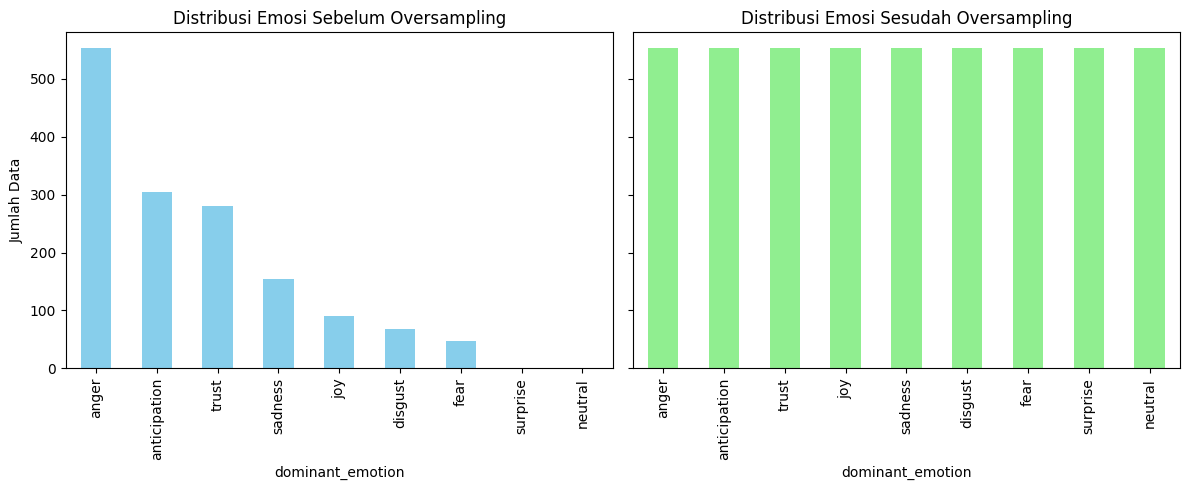

In [52]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# --- Distribusi sebelum oversampling ---
before_counts = df_kabur['dominant_emotion'].value_counts()

# --- Oversampling ---
X = df_kabur[['hasil_stemming']]
y = df_kabur['dominant_emotion']

max_count = y.value_counts().max()
sampling_strategy = {label: max_count for label in y.unique()}

oversampler = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

df_oversampled = pd.DataFrame({
    'hasil_stemming': X_resampled['hasil_stemming'],
    'dominant_emotion': y_resampled
})

after_counts = df_oversampled['dominant_emotion'].value_counts()

# --- Plot ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Sebelum oversampling
before_counts.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Distribusi Emosi Sebelum Oversampling')
axes[0].set_ylabel('Jumlah Data')

# Sesudah oversampling
after_counts.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Distribusi Emosi Sesudah Oversampling')

plt.tight_layout()
plt.show()


In [47]:
df_kabur[df_kabur["dominant_emotion"] == "anticipation"][["hasil_stemming","dominant_emotion"]].head()

,hasil_stemming,dominant_emotion
3,"[sepak, bola, muda, kita, rela, kaburajadulu, ...",anticipation
5,"[memang, kaburajadulu, bukan, buat, semua, ora...",anticipation
17,"[bismillah, kaburajadulu]",anticipation
20,"[semoga, bisa, segera, kaburajadulu, negeri, m...",anticipation
22,"[iya, hasil, kaburajadulu]",anticipation


In [53]:
# Simpan hasil oversampling ke file CSV
df_oversampled.to_csv('df_berlabel_part5_oversampled.csv', index=False)

print("Dataframe hasil oversampling telah disimpan sebagai 'df_kabur_oversampled.csv'")


Dataframe hasil oversampling telah disimpan sebagai 'df_kabur_oversampled.csv'


In [ ]:
df_kabur = df_kabur.drop(columns=["dominant_emotion"])

In [ ]:
dcek_label = df_kabur[['username', 'hasil_stemming','dominant_emotion']]

In [ ]:
dcek_label.to_csv('dcek_label.csv', index = False) # save data ulasan yang masih mentah

In [ ]:
def dominant_emotion(emotion_dict):
    if all(v == 0 for v in emotion_dict.values()):
        return 'neutral'  # atau bisa juga 'none'
    return max(emotion_dict, key=emotion_dict.get)

In [ ]:
# Terapkan ke kolom 'emotion_labels'
df_kabur['dominant_emotion'] = df_kabur['emotion_labels'].apply(dominant_emotion)

In [ ]:
print(df_kabur[['hasil_stemming', 'dominant_emotion']].head())


                                      hasil_stemming dominant_emotion
1  [iya, sana, bukan, tempat, rekomendasi, buat, ...          neutral
2  [amin, pls, kasung, bawa, aku, korea, kaburaja...          neutral
3  [sepak, bola, muda, rela, kaburajadulu, kejar,...     anticipation
4  [thought, hes, wni, kaburajadulu, nyata, bule,...            trust
5  [memang, kaburajadulu, bukan, buat, semua, ora...              joy


In [ ]:
df_kabur[df_kabur['dominant_emotion'] == ''][['hasil_stemming', 'dominant_emotion']]

,hasil_stemming,dominant_emotion


In [ ]:
data_berlabel = df_kabur[['username', 'hasil_stemming_str', 'dominant_emotion']]

data_berlabel.to_csv('data_berlabel_part5.csv', index=False)

In [ ]:
data_berlabel.head()

,username,hasil_stemming_str,dominant_emotion
1,minggudesu,"['iya', 'sana', 'bukan', 'tempat', 'rekomendas...",anger
2,closvit,"['mohon', 'kasung', 'bawa', 'aku', 'korea', 'k...",anger
3,womensfootie_id,"['sepak', 'bola', 'muda', 'kita', 'rela', 'kab...",anticipation
4,cotteshu,"['thought', 'hes', 'wni', 'kaburajadulu', 'nya...",trust
5,slow_ly_ving_,"['memang', 'kaburajadulu', 'bukan', 'buat', 's...",anticipation


In [ ]:
data_perbandingan_preprocessing = df_kabur[['username','full_text' ,'hasil_stemming_str', 'dominant_emotion']]

data_perbandingan_preprocessing.to_csv('data_before_and_after.csv', index=False)

In [ ]:
import torch
print(torch.cuda.is_available())


False


# Split Data Trainning & Test

In [ ]:

# Misalnya dataset kamu
df_split = df_kabur[['hasil_stemming','dominant_emotion']]

# Contoh tampilkan beberapa baris
df_split.head()


,hasil_stemming,dominant_emotion
1,"[iya, sana, bukan, tempat, rekomendasi, buat, ...",neutral
2,"[amin, pls, kasung, bawa, aku, korea, kaburaja...",neutral
3,"[sepak, bola, muda, rela, kaburajadulu, kejar,...",anticipation
4,"[thought, hes, wni, kaburajadulu, nyata, bule,...",trust
5,"[memang, kaburajadulu, bukan, buat, semua, ora...",joy


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_split['label_encoded'] = label_encoder.fit_transform(df_split['dominant_emotion'])

# Simpan label untuk mapping balik nanti
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))


<ipython-input-42-c9f7e7a8bbc2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_split['label_encoded'] = label_encoder.fit_transform(df_split['dominant_emotion'])


In [ ]:
from sklearn.model_selection import train_test_split

# Split data: 80% training, 20% testing
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df_split['hasil_stemming'],
    df_split['label_encoded'],
    test_size=0.2,
    random_state=42,
    stratify=df_split['label_encoded']  # memastikan distribusi label seimbang
)


In [ ]:
# Mengembalikan label angka ke string (nama emosi)
train_emotions = label_encoder.inverse_transform(train_labels)
test_emotions = label_encoder.inverse_transform(test_labels)

print("Distribusi label training:")
print(pd.Series(train_emotions).value_counts())

print("\nDistribusi label testing:")
print(pd.Series(test_emotions).value_counts())


Distribusi label training:
neutral         468
anticipation    225
trust           170
anger            86
disgust          75
fear             71
joy              68
sadness          35
surprise          2
Name: count, dtype: int64

Distribusi label testing:
neutral         117
anticipation     56
trust            43
anger            21
disgust          19
fear             17
joy              17
sadness           9
surprise          1
Name: count, dtype: int64


# IndoBERT Implementation

In [ ]:
pip install transformers datasets scikit-learn torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "indobenchmark/indobert-base-p1"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=8)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ValueError: malformed node or string: ['iya', 'sana', 'bukan', 'tempat', 'rekomendasi', 'buat', 'kaburajadulu', 'mana', 'guna', 'embel', 'enak', 'nonton', 'timnas', 'kuwait']

In [ ]:
# Misal df_train adalah DataFrame hasil split
train_texts = df_split['hasil_stemming'].tolist()
test_texts = df_split['label_encoded'].tolist()

In [ ]:
import ast

def parse_list(x):
    try:
        return ast.literal_eval(x)
    except:
        return x  # kalau sudah list, atau gagal parse, tetap dikembalikan

df_split['hasil_stemming'] = df_split['hasil_stemming'].apply(parse_list)


<ipython-input-48-ad45d95a90b9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_split['hasil_stemming'] = df_split['hasil_stemming'].apply(parse_list)


In [ ]:
print(df_split['hasil_stemming'].iloc[0])
print(type(df_split['hasil_stemming'].iloc[0]))


['iya', 'sana', 'bukan', 'tempat', 'rekomendasi', 'buat', 'kaburajadulu', 'mana', 'guna', 'embel', 'enak', 'nonton', 'timnas', 'kuwait']
<class 'list'>


In [ ]:
train_texts = [' '.join(doc) for doc in train_texts]
test_texts = df_split.loc[test_labels.index, 'hasil_stemming']
test_texts = test_texts.apply(lambda x: ' '.join(x)).tolist()

print(train_texts[:3])
print(test_texts[:3])

['iya sana bukan tempat rekomendasi buat kaburajadulu mana guna embel enak nonton timnas kuwait', 'amin pls kasung bawa aku korea kaburajadulu', 'sepak bola muda rela kaburajadulu kejar mimpi keysha bulgamin keluarga bahkan putus pindah finlandia belanda karier bola keysha nilai belanda punya prospek bagus progres sepak bola keysha tqwvcdgi']
['cari pacar negara ikut kaburajadulu', 'prospek mudah buat kaburajadulu', 'arti waktu kaburajadulu jadi diaspora xiysz re']


In [ ]:
# Gabungkan list kata menjadi kalimat
texts = df_split['hasil_stemming'].apply(lambda x: ' '.join(x))
labels = df_split['dominant_emotion']

In [ ]:
# Encode label string menjadi angka
le = LabelEncoder()
df_split['encoded_label'] = le.fit_transform(labels)

<ipython-input-63-bb31b4cb7f68>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_split['encoded_label'] = le.fit_transform(labels)


In [ ]:
# Simpan mapping label (jika ingin interpretasi hasil prediksi)
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

In [ ]:
# 3. Split data train/test
train_texts, test_texts, train_labels, test_labels = train_test_split(
    texts, df_split['encoded_label'], test_size=0.2, stratify=df_split['encoded_label'], random_state=42
)

In [ ]:
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts.tolist(), truncation=True, padding=True, max_length=128)

In [ ]:
from transformers import PreTrainedTokenizerFast

# pastikan train_texts dan test_texts adalah list dari kalimat
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

In [ ]:
import torch

# 6. Dataset class
class EmotionDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(int(self.labels[idx]))
        return item

    def __len__(self):
        return len(self.labels)



In [ ]:
# 7. Buat Dataset
train_dataset = EmotionDataset(train_encodings, train_labels)
test_dataset = EmotionDataset(test_encodings, test_labels)

In [ ]:
!pip install --upgrade transformers

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Contoh: jika datamu punya kolom 'label' berisi string emosi
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)


In [ ]:
class EmotionDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels  # Sudah berupa angka (int)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])  # -> error di sini kalau masih string
        return item

    def __len__(self):
        return len(self.labels)


In [ ]:
# Menyimpan label encoder
import pickle
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Asumsikan df_split['dominant_emotion'] adalah kolom label
df_split['encoded_label'] = le.fit_transform(df_split['dominant_emotion'])

# Simpan mapping label (opsional tapi berguna)
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)


In [ ]:
# 8. TrainingArguments & Trainer
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    logging_dir='./logs',
    logging_steps=10,
    report_to="none"  # Nonaktifkan wandb
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# 9. Train model
trainer.train()

KeyError: 184

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

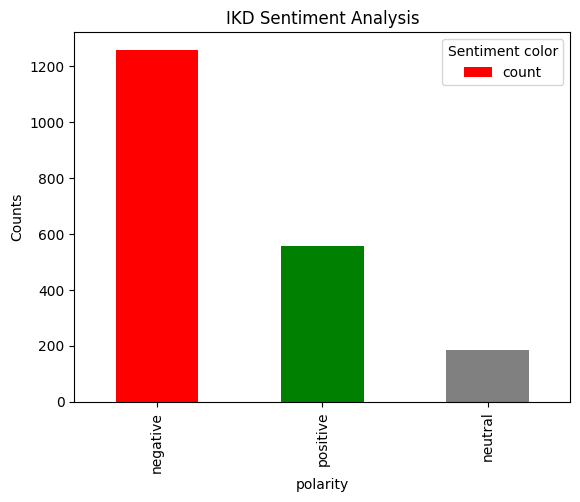

In [ ]:
fig, ax = plt.subplots()

plt.title('IKD Sentiment Analysis')
plt.xlabel('polarity')
plt.ylabel('Counts')
colors = ['red', 'green', 'grey']
df_ikd['polarity'].value_counts().plot(kind = 'bar', color= colors)
ax.legend(title='Sentiment color')
plt.show()

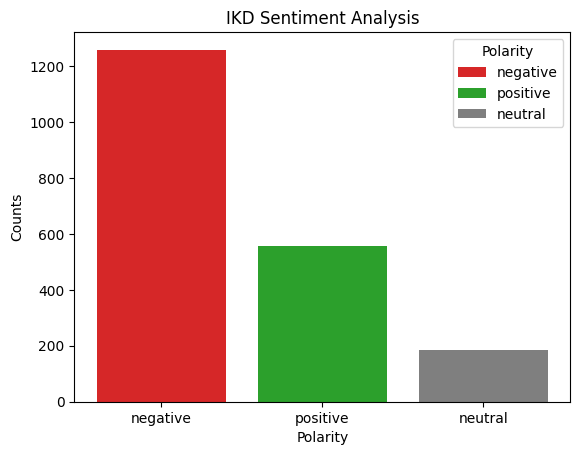

In [ ]:
import matplotlib.pyplot as plt

# Data untuk plot
polarity_counts = df_ikd['polarity'].value_counts().sort_values(ascending=False)
polarity = polarity_counts.index
counts = polarity_counts.values
bar_labels = polarity.astype(str)
bar_colors = ['tab:red', 'tab:green', 'tab:gray']  # Sesuaikan warna dengan kebutuhan

# Membuat plot
fig, ax = plt.subplots()

# Membuat bar chart
ax.bar(polarity, counts, label=bar_labels, color=bar_colors)

# Menambahkan label dan judul
ax.set_ylabel('Counts')
ax.set_xlabel('Polarity')
ax.set_title('IKD Sentiment Analysis')
ax.legend(title='Polarity')

# Menampilkan plot
plt.show()


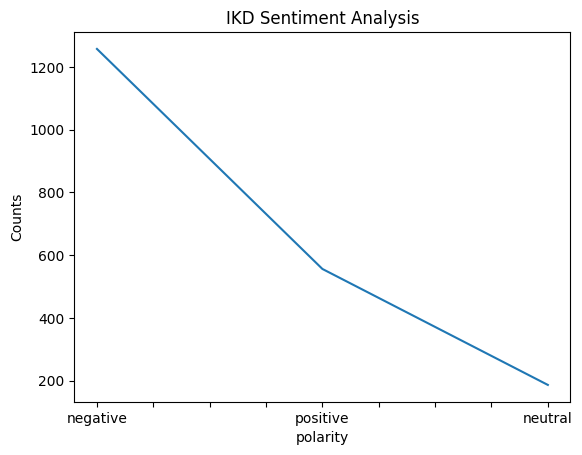

In [ ]:
plt.title('IKD Sentiment Analysis')
plt.xlabel('polarity')
plt.ylabel('Counts')
df_ikd['polarity'].value_counts().plot(kind = 'line')
plt.show()

Text(0.5, 1.0, 'Sentiment Polarity on IKD Review \n (total = 2000 review)')

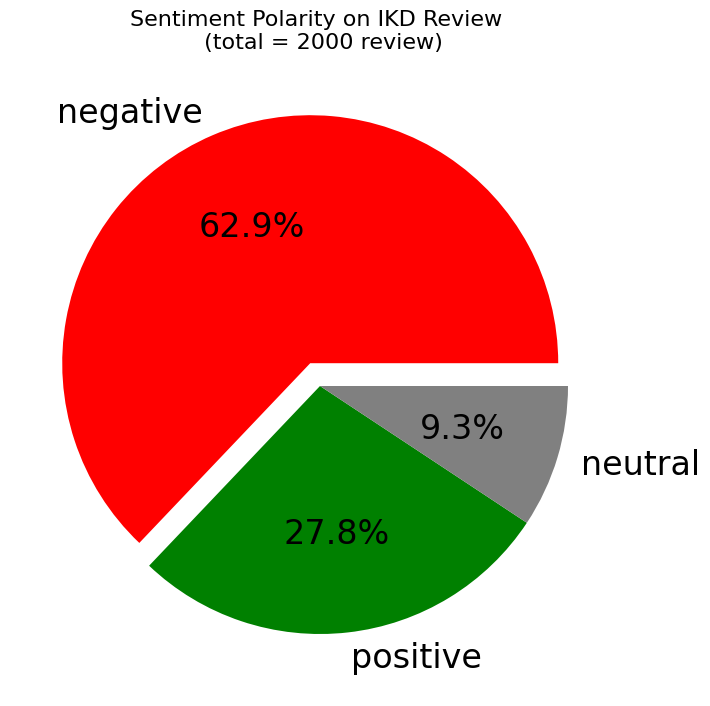

In [ ]:
fig, ax = plt.subplots(figsize = (8,10))
sizes = [count for count in df_ikd['polarity'].value_counts()]
labels = list(df_ikd['polarity'].value_counts().index)
explode = (0.1, 0, 0)
colors = ['red', 'green', 'grey']  # Hijau untuk positif, merah untuk negatif, abu-abu untuk netral
ax.pie(x= sizes, labels = labels, autopct = '%1.1f%%', colors = colors, explode = explode, textprops={'fontsize': 24})
ax.set_title('Sentiment Polarity on IKD Review \n (total = 2000 review)', fontsize = 16, pad = 20)

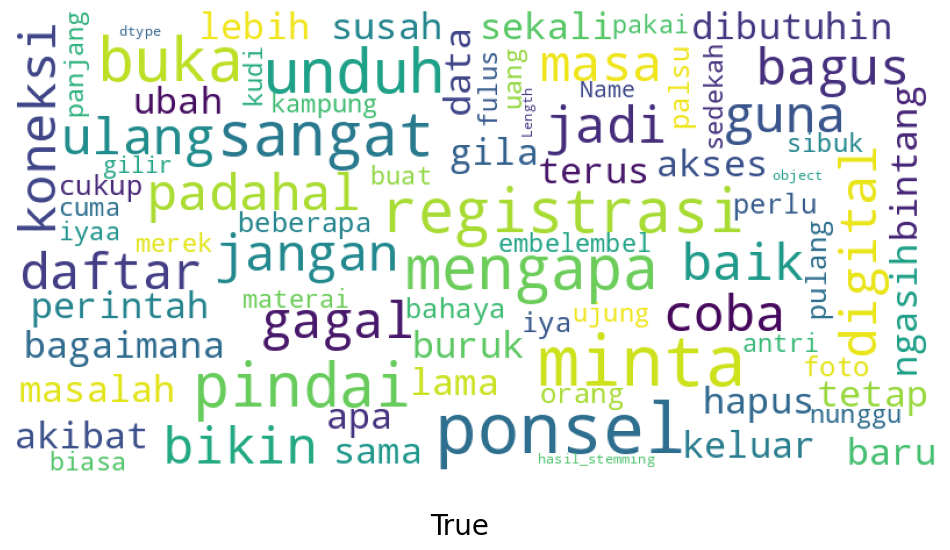

In [ ]:
from wordcloud import WordCloud

def wordcloud(data,title = True):
  wordcloud = WordCloud(
      background_color='white',
      max_words=250,
      max_font_size=30,
      scale=2,
      random_state=5
  ).generate(str(data))

  fig = plt.figure(1, figsize=(12, 12))
  plt.axis('off')
  if title:
      fig.suptitle(title, fontsize=20)
      fig.subplots_adjust(top=2.3)

  plt.imshow(wordcloud)
  plt.show()

wordcloud(df_ikd['hasil_stemming'])

In [ ]:
def word_with_sentiment(text):
  positive_words=[]
  negative_words=[]
  for word in text:
    score_pos = 0
    score_neg = 0
    if(word in lexicon_positive):
      score_pos = lexicon_positive[word]
    if(word in lexicon_negative):
      score_neg = lexicon_negative[word]

    if(score_pos + score_neg > 0):
      positive_words.append(word)
    elif(score_pos + score_neg < 0):
      negative_words.append(word)


  return positive_words, negative_words

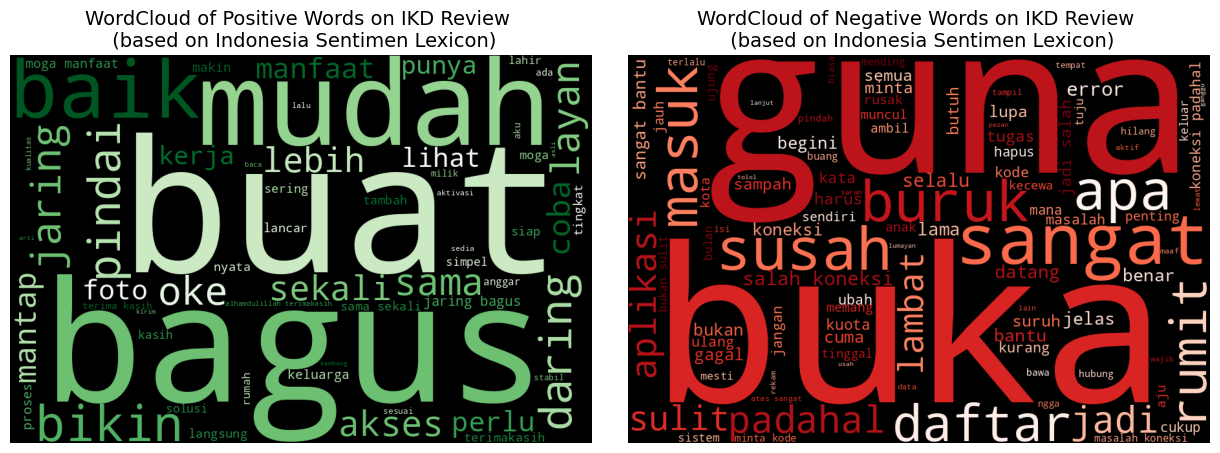

In [ ]:
sentimen_words= df_ikd['hasil_stemming'].apply(word_with_sentiment)
sentimen_words = list(zip(*sentimen_words))
positive_words = sentimen_words[0]
negative_words = sentimen_words[1]

fig, ax = plt.subplots(1, 2, figsize=(12, 10))
list_word_positive = ''
for row_word in positive_words:
  for word in row_word:
    list_word_positive += ' ' + (word)
wordcloud_positive = WordCloud(width=900, height=600, background_color='black', colormap = 'Greens', min_font_size=10).generate(list_word_positive)
ax[0].imshow(wordcloud_positive)
ax[0].grid(False)
ax[0].set_title('WordCloud of Positive Words on IKD Review \n (based on Indonesia Sentimen Lexicon)', fontsize=14)
fig.tight_layout(pad=0)
ax[0].axis('off')

list_word_negative = ''
for row_word in negative_words:
  for word in row_word:
    list_word_negative += ' ' + (word)
wordcloud_negative = WordCloud(width=900, height=600, background_color='black', colormap = 'Reds', min_font_size=10).generate(list_word_negative)
ax[1].imshow(wordcloud_negative)
ax[1].grid(False)
ax[1].set_title('WordCloud of Negative Words on IKD Review \n (based on Indonesia Sentimen Lexicon)', fontsize=14)
fig.tight_layout(pad=0)
ax[1].axis('off')

plt.show()

# Top 10 Positive and Negative Word

In [ ]:
pd.set_option('display.max_colwidth', 1000)
# positive_word = df_ikd[(df_ikd['polarity'] == 'positive') & (df_ikd['score'] == 5)]
positive_word = df_ikd[df_ikd['polarity'] == 'positive']
positive_word = positive_word[['hasil_stemming','polarity_scores','polarity']].sort_values(by = 'polarity_scores', ascending=False).reset_index(drop=True)
positive_word.index += 1
positive_word[0:10]

,hasil_stemming,polarity_scores,polarity
1,"[buat, digital, beri, mudah, mudah, mudah, sama, sekali, pergi, dulu, pindai, kode, verifikasi, validasi, baik, ikan, alternatif, pergi, lebih, mudah, proses, terimakasih]",17,positive
2,"[mengapa, cuma, kota, bekas, layan, buka, konfirmasi, kota, bekas, layan, situs, daring, sama, guna, buat, perlu, penting, desak, tingkat, layan, bila, memang, mudah, masyarakat, terimakasih]",17,positive
3,"[masa, tara, buat, baik, benar, koneksi, coba, kapan, coba, terus, buat, coba, buat, guna, uang, negara, bos, manfaat, penting, maju, sama, seluruh, rakyat, indonesia]",16,positive
4,"[tuju, mungkin, baik, pribadi, kendala, proses, pindai, qrcode, mengapa, sedia, waktu, antri, kantor, instasi, kait, desadisdukcapil, sita, waktu, mgkn, baik, proses, ganti, tempel, k, ponsel, mode, nfc, verifikasi, sama, kalaupun, sama, proses, tetap, lanjut]",15,positive
5,"[layan, ramah, digital, mudah, jaya]",14,positive
6,"[mudah, efisien, layan, ramah]",14,positive
7,"[hahaha, niat, unduh, perlu, k, eh, nyata, scanner, kasih, sama, tugas, sama, donk, tahu, gitu, atur, langsung]",13,positive
8,"[layan, bagus, mantap]",12,positive
9,"[mohon, pakai, liat, kek, negara, maju, baik, sulit percaya, mesti, nunggu, muat, minta, lebih, oke, oke, lebih, baik, digitalisasi, buat, lebih, mudah, akses, jangan, cuma, gimmick, liat, maju, sekian]",12,positive
10,"[buat, nge, gaji, pegawai, kerja, duduk, bisaa, gilir, beli, server, bagus, buat, bikin, kaga, pegawai, makan, duid, haram, susah, rakyat]",11,positive


In [ ]:
pd.set_option('display.max_colwidth', 1000)
negative_word = df_ikd[df_ikd['polarity'] == 'negative']
negative_word = negative_word[['hasil_stemming','polarity_scores','polarity']].sort_values(by = 'polarity_scores', ascending=False).reset_index(drop=True)
negative_word.index += 1
negative_word[0:10]

,hasil_stemming,polarity_scores,polarity
1,"[mengapa, buka]",-1,negative
2,"[mana, pak]",-1,negative
3,"[selamat, malam, mohon, masalah, loging, buka, mohon, beri, info, terima, kasih]",-1,negative
4,"[dokumen, cetak, kata, orang, sekarang, cetak, mandiridan, semua, keluh, diapplikasi, respons]",-1,negative
5,"[kembang, datany, cuma, kis, sim, buku, nikah, kartu, vaksin, npwp, datany]",-1,negative
6,[lumayan],-1,negative
7,"[siapa, lolosin, buat, nasional, kgak, guna, kntol]",-1,negative
8,"[antri, lama, mati, lampu]",-1,negative
9,"[le, buka, y]",-1,negative
10,"[buruk, anggar, besar, bikin, apps, tidak bisa, malu, goblokk]",-1,negative
